In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

- Let us assume CEV model $dS_t = (r − q)S_tdt + 𝜎S^𝛾_t dW_t$ under the risk-neutral measure.

- Implement the program that takes as an input
$(S_0, r, q, 𝜎, 𝛾, N, n, m, T)$, where $T$ is the maturity date, $N$
is the number of simulations, $n$ is the number of payoffs, $m$
is the number of discretization steps, and produces (using
the MC method) the option price estimate of the cliquet
contract with the the discounted payoff
$\sum_{i=1}^n e^{−rt_i}(S_{t_i} - S_{t_{i−1}})^+$ where $t_i = iT/n$.


- Select some parameters and generate the table of option
prices for different pairs of $(N, m)$.

In [2]:
S0 = 50      # initial value
r = 0.15    # model parameter r
q = 0.1     # model parameter q
sigma = 1   # model parameter σ
gamma = 0.7 # model parameter γ
N = 200     # number of simulations
n = 20      # number of payoffs
m = 5 * n   # number of discretization steps, must be a multiple of n
T = 30      # maturity date

In [3]:
rng = np.random.default_rng(seed=405) # fixing seed

In [4]:
h = T / m
t = np.linspace(0, T, m+1) # uniform grid on [0, T]

In [5]:
def sample_paths(S0=50, r=0.15, q=0.1, sigma=1, gamma=0.7, N=200, n=20, m=100, T=30, rng=np.random.default_rng(seed=405)):
    h = T / m
    t = np.linspace(0, T, m+1) # uniform grid on [0, T]
    Z = rng.normal(size=(m, N))
    S = np.zeros((m+1, N))
    S[0] = S0 * np.ones(N)
    for j in range(m):
        S[j+1] = S[j] + (r-q) * S[j] * h + sigma * np.sign(S[j]) * (np.abs(S[j]) ** gamma) * np.sqrt(h) * Z[j] + gamma * (sigma * sigma) / 2 * np.sign(S[j]) * (np.abs(S[j]) ** (2 * gamma - 1)) * h * (Z[j] * Z[j] - 1)
    return S

In [6]:
S = sample_paths()

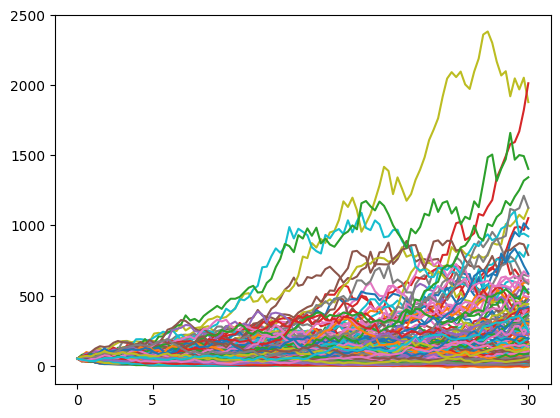

In [7]:
plt.plot(t, S);

In [6]:
def payoff_value(S, m, n, T):
    idx = np.arange(m/n, m+1, m/n, dtype=int)
    t = np.linspace(0, T, m+1) # uniform grid on [0, T]
    return np.mean(np.dot(np.exp(-r * t[idx]), np.maximum(S[idx] - S[idx - m//n], 0)))

In [12]:
gc.collect()

0

In [13]:
df = pd.DataFrame({'N': [], 'm': [], 'payoff': []})
i = 0
for N in [1000, 10**4, 10**5]:
    for m in [n*2, n*5, n*20, n*50, n*100]:
        #print(N, m)
        gc.collect()
        S = sample_paths(N=N, m=m, T=T)
        payoff = payoff_value(S, m, n, T)
        df.loc[i] = [N, m, payoff]
        i += 1


In [15]:
for N in [10**6]:
    for m in [n*2, n*10, n*25]:
        #print(N, m)
        gc.collect()
        S = sample_paths(N=N, m=m, T=T)
        payoff = payoff_value(S, m, n, T)
        df.loc[i] = [N, m, payoff]
        i += 1

In [16]:
df

,N,m,payoff
0,1000.0,40.0,46.020291
1,1000.0,100.0,50.058156
2,1000.0,400.0,48.689641
3,1000.0,1000.0,48.495708
4,1000.0,2000.0,47.532425
5,10000.0,40.0,46.140530
6,10000.0,100.0,46.226314
7,10000.0,400.0,47.180210
8,10000.0,1000.0,47.143388
9,10000.0,2000.0,47.851825
